# ตัวอย่างการวิเคราะห์ข้อมูลจากข้อมูลรายชื่อผู้ขายสินค้าในเว็บไซต์สินค้าเกษตรออนไลน์ DGT Farm

data.go.th

In [1]:
import requests
import pandas as pd

In [122]:
from pythainlp import word_tokenize
from wordcloud import WordCloud

In [57]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "TH Sarabun New"

ตัวอย่างนี้แสดงการอ่านข้อมูลจาก data.go.th API ซึ่งใช้ API Key ที่ได้สมัครและสร้างไว้แล้ว ข้อมูลเข้าถึงด้วยรหัสของชุดข้อมูลจากเว็บไซต์ด้วย __requests library__ และตั้งค่า headers ให้เป็นรหัส API key

In [24]:
resource_id = '8939d7e0-ece4-4270-8380-d0b63c178330'

In [25]:
API_KEY = 'C4dYKA5cTX8PPARwQ9GgLFGwWdXS1Hdi'

In [29]:
url = 'https://opend.data.go.th/get-ckan/datastore_search?resource_id={}'.format(resource_id)
resp = requests.get(url, headers={'api-key': API_KEY}).json()

ข้อมูลที่ได้จาก API เป็น JSON format ซึ่งแปลงเป็น dictionary ด้วย json method โดย dictionary มี key ดังนี้คือ help, success และ result โดยข้อมูลที่ต้องการอยู่ใน result key

In [32]:
resp.keys()

dict_keys(['help', 'success', 'result'])

เนื่องจาก Pandas สามารถอ่าน JSON เพื่อสร้าง data frame ได้เราจึงสร้าง data frame ขึ้นเพื่อการวิเคราะ์ข้อมูล

In [84]:
df = pd.DataFrame(resp['result']['records'])

In [85]:
df.head()

,_id,ลำดับ,ชื่อ-นามสกุล,จังหวัด,ประเภทสินค้า,ชื่อสินค้า,มาตรฐานที่ได้รับ
0,1,1,ณัฏฐ์ชพัชร์ มาจันทร์,ลำพูน,ผลไม้\nข้าว,เสาวรส\nลำไยอบแห้งสีทอง\nข้าวไรซ์เบอร์รี่\nข้า...,Organic
1,2,2,นางมาติกา ศรีวรรณะ,กำแพงเพชร,แปรรูป,น้ำอ้อย,อยู่ในระยะปรับเปลี่ยน Organic
2,3,3,จันทร์จิรา แก้วบัว,พัทลุง,แปรรูป,แป้งสาคู,อยู่ระหว่างขอการรับรอง GAP
3,4,4,เรณู ขลุ่ยนาค,พิษณุโลก,ผลไม้,มะม่วงน้ำดอกไม้สีทอง,GAP
4,5,5,ดีดี ออแกนิค ฟาร์ม,ศรีสะเกษ,ผัก,เห็ดนางฟ้าออแกนิค\nเห็ดนางฟ้าออแกนิค\nเห็ดกริ๊...,Organic Thailand


ตั้งชื่อคอลัมน์และค่า index ใหม่

In [86]:
df.columns = ['_id', 'no', 'name', 'province', 'prod_type', 'product', 'standard']

In [87]:
df.set_index('_id', inplace=True)

In [88]:
df.head()

,no,name,province,prod_type,product,standard
_id,,,,,,
1,1,ณัฏฐ์ชพัชร์ มาจันทร์,ลำพูน,ผลไม้\nข้าว,เสาวรส\nลำไยอบแห้งสีทอง\nข้าวไรซ์เบอร์รี่\nข้า...,Organic
2,2,นางมาติกา ศรีวรรณะ,กำแพงเพชร,แปรรูป,น้ำอ้อย,อยู่ในระยะปรับเปลี่ยน Organic
3,3,จันทร์จิรา แก้วบัว,พัทลุง,แปรรูป,แป้งสาคู,อยู่ระหว่างขอการรับรอง GAP
4,4,เรณู ขลุ่ยนาค,พิษณุโลก,ผลไม้,มะม่วงน้ำดอกไม้สีทอง,GAP
5,5,ดีดี ออแกนิค ฟาร์ม,ศรีสะเกษ,ผัก,เห็ดนางฟ้าออแกนิค\nเห็ดนางฟ้าออแกนิค\nเห็ดกริ๊...,Organic Thailand


<AxesSubplot:ylabel='province'>

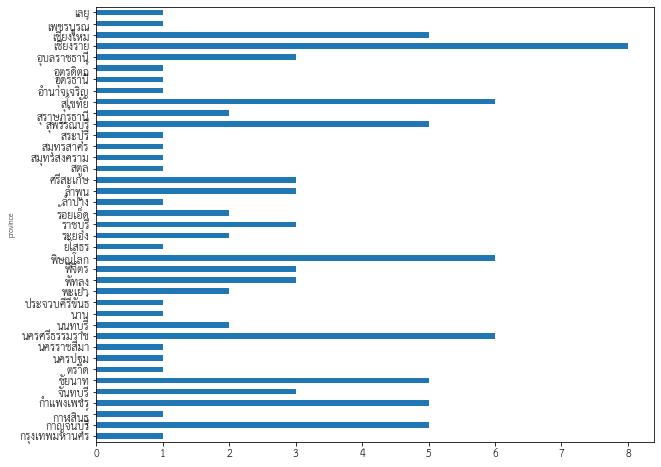

In [155]:
df.groupby(['province']).size().plot.barh(figsize=(10,8), fontsize=16)

<AxesSubplot:xlabel='province'>

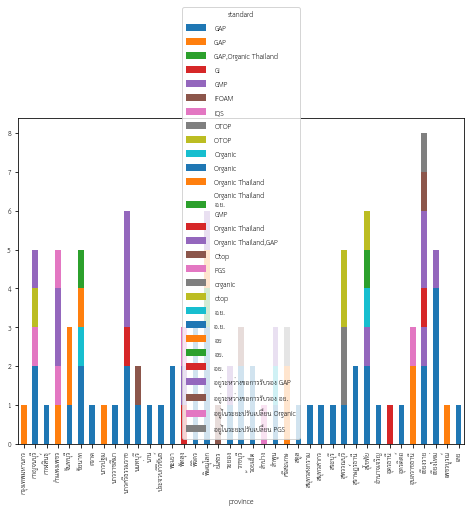

In [91]:
df.groupby([df.columns[2], df.columns[5]]).size().unstack().plot(kind='bar', stacked=True, figsize=(8,6))

In [92]:
df.groupby(['province', 'standard']).size().unstack()

standard,GAP,GAP,"GAP,Organic Thailand",GI,GMP,IFOAM,IQS,OTOP,OTOP,Organic,...,otop,อ.ย.,อ.ย.,อย,อย.,อย.,อยู่ระหว่างขอการรับรอง GAP,อยู่ระหว่างขอการรับรอง อย.,อยู่ในระยะปรับเปลี่ยน Organic,อยู่ในระยะปรับเปลี่ยน PGS
province,,,,,,,,,,,,,,,,,,,,,
กรุงเทพมหานคร,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
กาญจนบุรี,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
กาฬสินธุ์,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
กำแพงเพชร,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,1.0,NaN
จันทบุรี,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ชัยนาท,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
ตราด,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
นครปฐม,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
นครราชสีมา,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## การวิเคราะห์ชนิดของสินค้าที่ขายในเว็บออนไลน์

In [93]:
from collections import defaultdict

In [95]:
all_products = defaultdict(int)  # use default dict with integer as a default value to keep the count

In [133]:
for prod in df['product']:
    for p in prod.split('\n'):  # products are separated by a new line character
        all_products[p] += 1

ปัญหาคือโปรแกรมไม่แยกคำตามที่เหมาะสมทำให้การนับไม่มีประโยชน์ในการวิเคราะห์มากนัก

In [105]:
all_products

defaultdict(int,
            {'เสาวรส': 1,
             'ลำไยอบแห้งสีทอง': 1,
             'ข้าวไรซ์เบอร์รี่': 1,
             'ข้าวหอมมะลิ': 5,
             'ข้าวเหนียวก่ำลืมผัว': 1,
             'ข้าวหอมอุบล': 1,
             'น้ำอ้อย': 1,
             'แป้งสาคู': 1,
             'มะม่วงน้ำดอกไม้สีทอง': 2,
             'เห็ดนางฟ้าออแกนิค': 2,
             'เห็ดกริ๊ก เห็ดทอดสมุนไพร': 1,
             'ลำไย': 2,
             'ข้าวชงอินทรีย์ไรซ์เบอรี่': 1,
             '': 6,
             'สับปะรด': 1,
             'กรีนโอ๊ค ออร์แกนิค': 1,
             'กรีนคอส ออร์แกนิค': 1,
             'บัตเตอร์เฮด': 1,
             'เรดโอ๊ค ออร์แกนิค': 1,
             'น้ำมันมะพร้าวสกัดเย็น': 2,
             'เมล่อน ': 1,
             'กล้วยอาบแดด': 1,
             'ข้าวกล้องหอม': 1,
             'ข้าวกล้องไรซ์เบอร์รี่': 1,
             'ข้าวโพด': 1,
             'ปราร้าผง': 1,
             'พริกไทยดำ ': 1,
             'พริกไทยดำแพ็คสุญญากาศ ': 1,
             'พริกไทย ขวดป่น ': 1,
             'พริ

In [112]:
all_products = defaultdict(int)

เราสามารถลองใช้ word tokenizer ของ PyThaiNLP เพื่อแยกคำให้สามารถนับได้เหมาะสมมากขึ้น

In [113]:
for prod in df['product']:
    for p in prod.split('\n'):
        for w in word_tokenize(p):
            all_products[w] += 1

ใช้ list comprehension ในการสร้าง dictionary และกรองเฉพาะคำที่ยาวและมีความถี่ตามต้องการ

In [134]:
popular_products = {k:v for k,v in all_products.items() if v > 2 and len(k) > 3}

In [135]:
popular_products

{'ลำไย': 10,
 'แห้ง': 5,
 'ข้าว': 37,
 'เบอร์': 5,
 'หอมมะลิ': 11,
 'ข้าวเหนียว': 4,
 'มะม่วง': 8,
 'น้ำดอกไม้': 5,
 'เห็ด': 17,
 'นางฟ้า': 4,
 'อินทรีย์': 8,
 'ซ์เบอ': 7,
 'กรีน': 3,
 'โอ๊ค': 3,
 'ออร์แกนิค': 5,
 'น้ำมัน': 3,
 'มะพร้าว': 7,
 'ล่อน': 5,
 'กล้วย': 5,
 'ข้าวกล้อง': 13,
 'ทับทิม': 4,
 'ผักบุ้งจีน': 3,
 'ข้าวหมาก': 4,
 'น้ำผึ้ง': 3,
 'Organic': 3,
 'กาแฟ': 3,
 'คั่ว': 4,
 'น้ำพริก': 7,
 'กรอบ': 6,
 'ถั่ว': 4,
 'สังข์': 3,
 'ตะไคร้': 3,
 'ไข่ไก่': 4,
 'ลูกเดือย': 5,
 'หน่อไม้': 3,
 'นึ่ง': 3,
 'คะน้า': 3,
 'ข้าวหอมมะลิ': 5,
 'เมล่อน': 3}

นำจำนวนนับที่ได้มาใช้ในการสร้าง wordcloud ด้วยความถี่ของคำ

In [145]:
wc = WordCloud(font_path='/Library/Fonts/Arial Unicode.ttf',
               background_color='white',
               max_font_size=100
              )
wc.generate_from_frequencies(frequencies=popular_products)

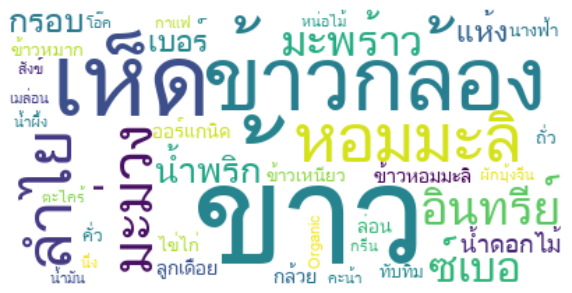

In [147]:
plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()